# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all data from the table
table_soup = html_soup.find('table', class_='table')

In [6]:
# Remove header rows (id, terrestrial_date, etc) to aid in data analyis down below
header_soup = table_soup.find_all('th')

In [7]:
# Isolate the rows of data 
data_soup = table_soup.find_all('tr', class_='data-row')

# Looks like each cell in the table needs to be scraped, all cells have tag 'td'
for data_row in data_soup:
    raw = data_row.find_all('td')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
header = []
temp_data = []

# Loop through the scraped data to create a list of rows
for data_row in data_soup: 
    raw = data_row.find_all('td')
    raw_list = []
    for cell in raw: 
        raw_list.append(cell.text)
        temp_data.append(raw_list)

for header in header_soup:
    label= header.text
    header.append(label)

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
temp_df = pd.DataFrame(temp_data, columns= ['id', 'terrestrial_date', 'sol', 'ls', 'month',
                                           'min_temp', 'pressure'])

In [10]:
# Confirm DataFrame was created successfully
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,2,2012-08-16,10,155,6,-75.0,739.0
2,2,2012-08-16,10,155,6,-75.0,739.0
3,2,2012-08-16,10,155,6,-75.0,739.0
4,2,2012-08-16,10,155,6,-75.0,739.0
...,...,...,...,...,...,...,...
13064,1895,2018-02-27,1977,135,5,-77.0,727.0
13065,1895,2018-02-27,1977,135,5,-77.0,727.0
13066,1895,2018-02-27,1977,135,5,-77.0,727.0
13067,1895,2018-02-27,1977,135,5,-77.0,727.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.

In [11]:
# Examine data type of each column
temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis 
# change date to datetime 64
temp_df[['terrestrial_date']] = temp_df[['terrestrial_date']].astype('datetime64')
# sol & ls & month to int
temp_df[['sol', 'ls', 'month']] = temp_df[['sol', 'ls', 'month']].astype('int64')
# min_temp & pressure to floats 
temp_df[['min_temp', 'pressure']] = temp_df[['min_temp', 'pressure']].astype('float64')

In [13]:
# Confirm type changes were successful by examining data types again
temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [17]:
# 1. How many months are there on Mars?
months = temp_df['month'].nunique()
months

12

In [19]:
# 2. How many Martian days' worth of data are there?
days = temp_df['sol'].nunique()
days

1867

In [20]:
# 3. What is the average low temperature by month?
months = temp_df.groupby('month')
ave_min_temp = months['min_temp'].mean()
ave_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

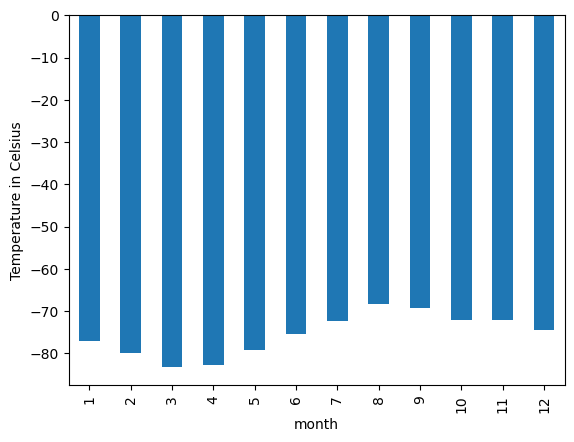

In [26]:
# Plot the average temperature by month
ave_min_temp.plot.bar()
plt.ylabel('Temperature in Celsius')

In [31]:
# Identify the coldest months in Curiosity's location
coldest_month = list(ave_min_temp.nsmallest(1).index)[0]
print(f'It appears as though month number {coldest_month} has the most lowest temperatures.')

It appears as though month number 3 has the most lowest temperatures.


In [30]:
# Identify the hottest months in Curiosity's location
hottest_month = list(ave_min_temp.nlargest(1).index)[0]
print(f'It appears as though month number {hottest_month} has the highest temperatures.' )

It appears as though month number 8 has the highest temperatures.


In [32]:
# 4. Average pressure by Martian month
# Here I used the group by of months (months) created in cells above, and isolated the pressure column of that groupby
pressures = months['pressure'].mean()
pressures

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

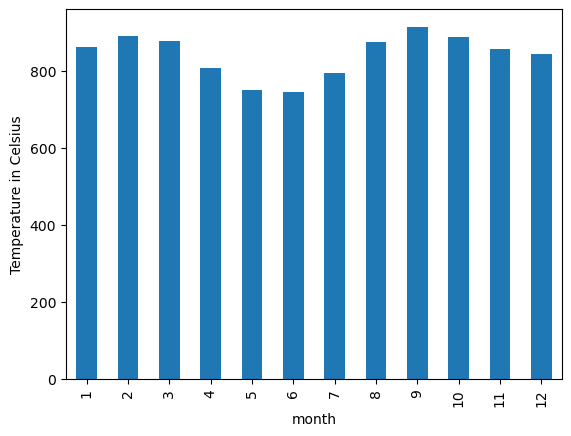

In [36]:
# Plot the average pressure by month
pressures.plot.bar()
plt.ylabel("Temperature in Celsius")

Text(0, 0.5, 'Minimum Temp (C)')

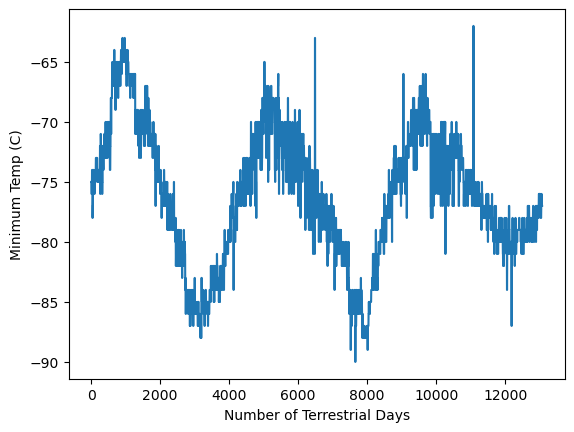

In [39]:
# Plot number of terrestrial days with minimum temperature 
temp_df['min_temp'].plot()
plt.xlabel('Number of Terrestrial Days')
plt.ylabel("Minimum Temp (C)")

In [40]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# When the solar longitude (ls) is = 0, Mars is experiencing a vernal equinox.
# i.e. if I isolate when ls = 0 I can easily find year to year points 
equinox_df = temp_df[temp_df['ls']==0]
equinox_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
2128,320,2013-08-01,351,0,1,-75.0,853.0
2129,320,2013-08-01,351,0,1,-75.0,853.0
2130,320,2013-08-01,351,0,1,-75.0,853.0
2131,320,2013-08-01,351,0,1,-75.0,853.0
2132,320,2013-08-01,351,0,1,-75.0,853.0
2133,320,2013-08-01,351,0,1,-75.0,853.0
2134,320,2013-08-01,351,0,1,-75.0,853.0
2135,319,2013-08-02,352,0,1,-77.0,854.0
2136,319,2013-08-02,352,0,1,-77.0,854.0
2137,319,2013-08-02,352,0,1,-77.0,854.0


In [42]:
# Now I can choose equinox points; first is 2013-08-01
# The next YEAR that shows up is 2015, so the next point is 2015-06-19
M_year = pd.Timestamp("2013-08-01") - pd.Timestamp("2015-06-19")
print(f'A Martian year is about {M_year} on Earth')

A Martian year is about -687 days +00:00:00 on Earth


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV
temp_df.to_csv('Mars_Weather_data.csv')

In [44]:
browser.quit()